 ## **HOMEWORK 2**

Afonso Rosa, ist1106700<br>
Leticia Vong, ist1105991

**II. Programming and critical analysis** [8v]

Consider the parkinsons.csv dataset (available at the course’s webpage), where the goal is to predict a patient’s score on the Unified Parkinson’s Disease Rating Scale based on various biomedical measurements.

To answer question 5), average the performance of the models over 10 separate runs. In each run, use a different 80-20 train-test split by setting a random_state=i, with i=1..10.

**5. [2v]** Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10 neurons each and no activation functions, and another MLP Regressor with 2 hidden layers of 10 neurons each using ReLU activation functions. (Use random_state=0 on the MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.

/home/afonso215/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonso215/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonso215/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonso215/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/afonso215/.local/lib/python3.1

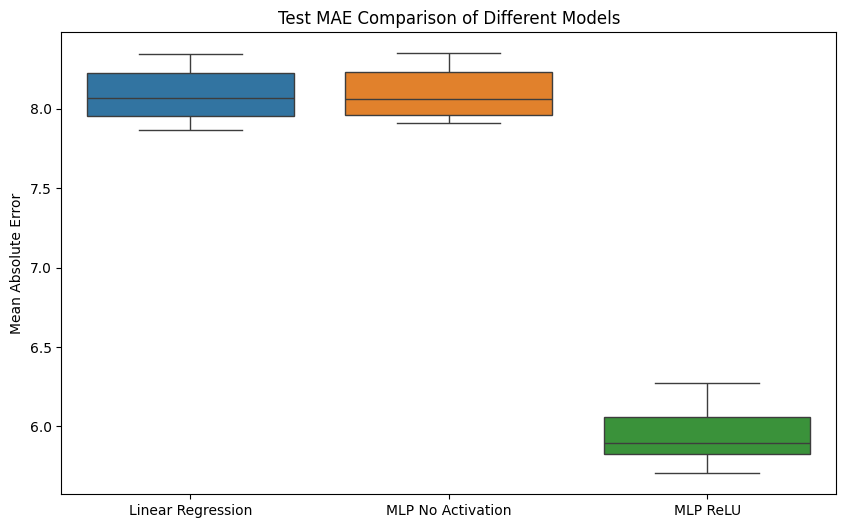

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('parkinsons.csv') 

X = data.drop(columns=['target']) 
y = data['target']

mae_linear = []
mae_mlp_no_activation = []
mae_mlp_relu = []

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    mae_linear.append(mean_absolute_error(y_test, y_pred_linear))
    
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0)
    mlp_no_activation.fit(X_train, y_train)
    y_pred_no_activation = mlp_no_activation.predict(X_test)
    mae_mlp_no_activation.append(mean_absolute_error(y_test, y_pred_no_activation))
    
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
    mlp_relu.fit(X_train, y_train)
    y_pred_relu = mlp_relu.predict(X_test)
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred_relu))

results = pd.DataFrame({
    'Linear Regression': mae_linear,
    'MLP No Activation': mae_mlp_no_activation,
    'MLP ReLU': mae_mlp_relu
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=results)
plt.title('Test MAE Comparison of Different Models')
plt.ylabel('Mean Absolute Error')
plt.show()


**6.** [3v] Compare a Linear Regression with a MLP with no activations, and explain the impact and the importance of using activation functions in a MLP. Support your reasoning with the results from the boxplots

Uma regressão linear ajusta um único modelo linear aos dados. Também o MLP sem ativação se comporta como um modelo linear, mesmo tendo várias camadas, pois usando a função identidade como ativação cada camada no MLP calcula apenas uma combinação linear dos inputs, levando ao mesmo resultado que a regressão linear. Isto mostra que, sem as funções de ativação, o MLP não está a adicionar complexidade, e é comprovado pelos resultados dos boxplots realizados no exercício anterior, uma vez que nos mesmos tanto a regressão linear como o MLP sem ativação apresentam níveis semelhantes de erro médio absoluto (MAE).

As funções de ativação são então importantes para introduzir não linearidade no modelo, possibilitando que aprenda relações mais complexas que os modelos lineares não conseguem captar. O MLP com ativação ReLU aplica então uma transformação não linear em cada camada, introduzindo assim complexidade adicional no modelo o que permite que realize previsões mais precisas. Também a importância das funções de ativação está evidenciada nos resultados dos boxplots, apresentando um erro médio absoluto significativamente mais baixo que a regressão linear e o MLP sem ativação.


**7.** [4v] Using a 80-20 train-test split with random_state=0, use a Grid Search to tune the hyperparameters of an MLP regressor with two hidden layers (size 10 each). The parameters to search over are:<br>
(i) L2 penalty, with the values {0.0001, 0.001, 0.01};  <br>
(ii) learning rate, with the values {0.001, 0.01, 0.1}; and <br>
(iii) batch size, with the values {32, 64, 128}. Plot the test MAE for each combination of hyperparameters, report the best combination, and discuss the trade-offs between the combinations.

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   3.3s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   3.9s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   4.3s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   4.4s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.1; total time=   4.5s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   6.1s
[CV] END alpha=0.0001, batch_size=64, learning_rate_init=0.01; total time=   4.0s
[CV] END alpha=0.0001, batch_size=64, learning_rate_init=0.01; total time=   3.1s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   7.8s
[CV] END alpha=0.0001, batch_size=64, learning_rate_init=0.01; total time=   4.3s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.01; total time=   8.6s
[CV] END alpha=0.0001, batch_size=64, lea

/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, batch_size=64, learning_rate_init=0.001; total time=  17.8s
[CV] END alpha=0.0001, batch_size=128, learning_rate_init=0.1; total time=   2.6s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, batch_size=128, learning_rate_init=0.001; total time=   9.7s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, batch_size=128, learning_rate_init=0.001; total time=   9.7s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, batch_size=128, learning_rate_init=0.001; total time=   9.8s
[CV] END alpha=0.0001, batch_size=128, learning_rate_init=0.001; total time=  10.1s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, batch_size=128, learning_rate_init=0.001; total time=  10.0s
[CV] END .alpha=0.001, batch_size=32, learning_rate_init=0.1; total time=   2.3s
[CV] END alpha=0.0001, batch_size=64, learning_rate_init=0.001; total time=  21.0s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=  21.0s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .alpha=0.001, batch_size=32, learning_rate_init=0.1; total time=   2.6s
[CV] END alpha=0.001, batch_size=32, learning_rate_init=0.01; total time=   4.9s
[CV] END alpha=0.001, batch_size=32, learning_rate_init=0.01; total time=   6.4s
[CV] END .alpha=0.001, batch_size=32, learning_rate_init=0.1; total time=   4.7s
[CV] END .alpha=0.001, batch_size=32, learning_rate_init=0.1; total time=   2.8s
[CV] END .alpha=0.001, batch_size=32, learning_rate_init=0.1; total time=   4.8s
[CV] END alpha=0.001, batch_size=32, learning_rate_init=0.01; total time=   6.3s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=  24.8s
[CV] END alpha=0.001, batch_size=32, learning_rate_init=0.01; total time=   8.9s
[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=  26.3s
[CV] END alpha=0.001, batch_size=64, learning_rate_init=0.01; total time=   3.4s
[CV] END alpha=0.001, batch_size=32, learning_rate_init=0.01; total time=  10.6s
[CV] END .alpha=0.001, b

/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=64, learning_rate_init=0.001; total time=  17.0s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=128, learning_rate_init=0.001; total time=   9.9s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.0001, batch_size=32, learning_rate_init=0.001; total time=  39.3s
[CV] END alpha=0.001, batch_size=64, learning_rate_init=0.001; total time=  17.1s
[CV] END alpha=0.001, batch_size=128, learning_rate_init=0.001; total time=   9.6s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=128, learning_rate_init=0.001; total time=  10.0s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=128, learning_rate_init=0.001; total time=  11.6s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=64, learning_rate_init=0.001; total time=  20.7s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.001, batch_size=128, learning_rate_init=0.001; total time=  11.6s
[CV] END alpha=0.001, batch_size=64, learning_rate_init=0.001; total time=  19.6s
[CV] END alpha=0.001, batch_size=32, learning_rate_init=0.001; total time=  27.7s
[CV] END ..alpha=0.01, batch_size=32, learning_rate_init=0.1; total time=   3.8s
[CV] END alpha=0.001, batch_size=32, learning_rate_init=0.001; total time=  28.4s
[CV] END ..alpha=0.01, batch_size=32, learning_rate_init=0.1; total time=   4.5s
[CV] END ..alpha=0.01, batch_size=32, learning_rate_init=0.1; total time=   3.6s
[CV] END ..alpha=0.01, batch_size=32, learning_rate_init=0.1; total time=   2.7s
[CV] END .alpha=0.01, batch_size=32, learning_rate_init=0.01; total time=   7.1s
[CV] END ..alpha=0.01, batch_size=32, learning_rate_init=0.1; total time=   4.7s
[CV] END alpha=0.001, batch_size=32, learning_rate_init=0.001; total time=  30.2s
[CV] END .alpha=0.01, batch_size=32, learning_rate_init=0.01; total time=   8.9s
[CV] END alpha=0.001, 

/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .alpha=0.01, batch_size=32, learning_rate_init=0.01; total time=   9.2s
[CV] END ..alpha=0.01, batch_size=64, learning_rate_init=0.1; total time=   2.5s
[CV] END .alpha=0.01, batch_size=32, learning_rate_init=0.01; total time=  10.6s
[CV] END ..alpha=0.01, batch_size=64, learning_rate_init=0.1; total time=   2.9s
[CV] END ..alpha=0.01, batch_size=64, learning_rate_init=0.1; total time=   2.7s
[CV] END ..alpha=0.01, batch_size=64, learning_rate_init=0.1; total time=   4.2s
[CV] END ..alpha=0.01, batch_size=64, learning_rate_init=0.1; total time=   2.4s
[CV] END .alpha=0.01, batch_size=64, learning_rate_init=0.01; total time=   6.4s
[CV] END .alpha=0.01, batch_size=64, learning_rate_init=0.01; total time=   6.0s
[CV] END .alpha=0.01, batch_size=64, learning_rate_init=0.01; total time=   7.9s
[CV] END .alpha=0.01, batch_size=64, learning_rate_init=0.01; total time=   6.9s
[CV] END alpha=0.01, batch_size=128, learning_rate_init=0.01; total time=   2.6s
[CV] END .alpha=0.01, batch_

/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, batch_size=128, learning_rate_init=0.001; total time=  11.4s
[CV] END alpha=0.01, batch_size=128, learning_rate_init=0.001; total time=  11.4s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, batch_size=128, learning_rate_init=0.001; total time=  10.8s
[CV] END alpha=0.01, batch_size=64, learning_rate_init=0.001; total time=  18.6s
[CV] END .alpha=0.01, batch_size=128, learning_rate_init=0.1; total time=   3.9s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, batch_size=128, learning_rate_init=0.001; total time=  10.7s
[CV] END alpha=0.01, batch_size=64, learning_rate_init=0.001; total time=  18.7s
[CV] END alpha=0.01, batch_size=64, learning_rate_init=0.001; total time=  17.7s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, batch_size=128, learning_rate_init=0.001; total time=  12.2s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, batch_size=64, learning_rate_init=0.001; total time=  18.5s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, batch_size=64, learning_rate_init=0.001; total time=  19.6s
[CV] END alpha=0.01, batch_size=32, learning_rate_init=0.001; total time=  28.7s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, batch_size=32, learning_rate_init=0.001; total time=  29.2s


/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END alpha=0.01, batch_size=32, learning_rate_init=0.001; total time=  28.9s
[CV] END alpha=0.01, batch_size=32, learning_rate_init=0.001; total time=  28.7s
Best Hyperparameters: {'alpha': 0.001, 'batch_size': 32, 'learning_rate_init': 0.001}
Best Cross-Validation MAE: 4.544115093964946
Test MAE with Best Hyperparameters: 4.335753926547961


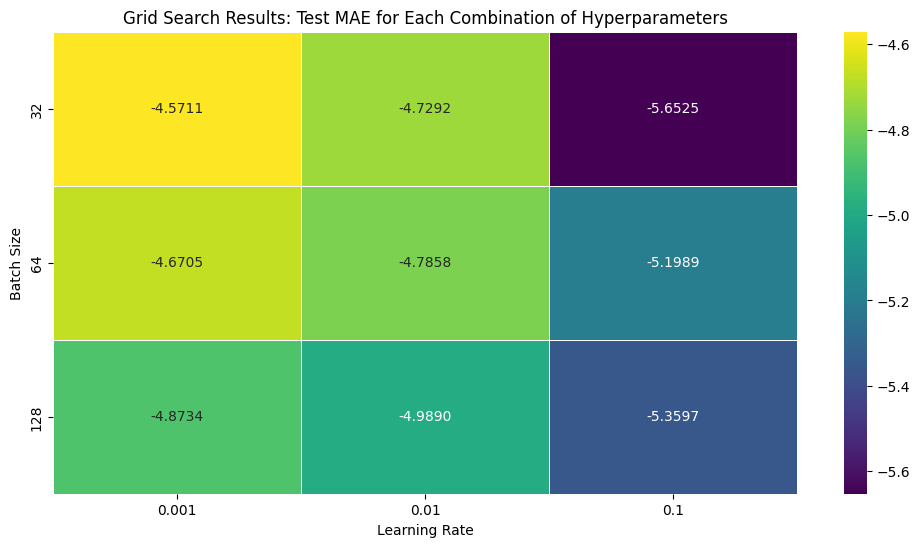

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('parkinsons.csv') 

X = data.drop(columns=['target']) 
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mlp = MLPRegressor(hidden_layer_sizes=(10, 10), random_state=0)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty
    'learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
    'batch_size': [32, 64, 128]  # Batch size
}

scorer = make_scorer(mean_absolute_error, greater_is_better=False)

grid_search = GridSearchCV(mlp, param_grid, scoring=scorer, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Since we're minimizing MAE, we negate the negative score

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation MAE:", best_score)

y_pred = grid_search.best_estimator_.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("Test MAE with Best Hyperparameters:", test_mae)

results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(12, 6))
sns.heatmap(results.pivot_table(values='mean_test_score', index='param_batch_size', columns='param_learning_rate_init'),
            annot=True, fmt='.4f', cmap='viridis', linewidths=0.5)
plt.title('Grid Search Results: Test MAE for Each Combination of Hyperparameters')
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.show()


Explanation of the Code:
Hyperparameter Grid:

alpha: L2 regularization (or penalty) that controls overfitting. Lower values allow more complexity, while higher values impose a stronger regularization.
learning_rate_init: Initial learning rate for the MLP optimizer. It controls how large the steps are during the optimization process. Too high of a value can cause the model to miss the optimal solution, while too small of a value may cause slow learning.
batch_size: Number of samples processed before the model is updated. Smaller batch sizes lead to noisier but more frequent updates, while larger batch sizes provide more stable updates but slower learning.
Grid Search: We use GridSearchCV with 5-fold cross-validation to evaluate all possible combinations of hyperparameters.

Plotting: We use a heatmap to visualize the mean cross-validation MAE for each combination of learning_rate_init and batch_size.

Results and Trade-offs:
Best Hyperparameters: After the grid search, the best combination of hyperparameters is reported, and the model is evaluated on the test set to determine the final MAE.

Trade-offs:

L2 Penalty (alpha): A higher L2 penalty reduces overfitting but may underfit the data if it's too strong.
Learning Rate: A small learning rate can lead to slow convergence, while a high learning rate can lead to divergence. The ideal learning rate finds the right balance between fast learning and stable convergence.
Batch Size: Smaller batches can lead to more noisy updates but allow the model to learn faster. Larger batches provide more stability but may slow down learning.
In the plot, the heatmap will visually show how different combinations of hyperparameters affect the test MAE, allowing you to compare their trade-offs.